# Учебный Проект → «Бета-Банк»

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note</span>
    <p class="mb-0">В коде использую <code>display()</code> намеренно, потомучто это однозначно даёт понять что планируется вывод / печать результатов. 👌</p>
</div>


Привет, меня зовут Артем Хуршудов. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо.
* Молодец, что структурируешь ноутбук, приятно проверять такие работы.
* Интересная статья про одну из метрик: <a href="https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/">ссылка</a>.
* В работе допущены ошибки. Однако исправления не займут много времени.
* Жду новую версию проекта.

<div class="alert alert-block alert-warning">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p>
        <b>Комментарий студента:</b>
        <span style="color:#272727">Понял, принял.</span>
    </p>
</div>

## Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.
Постройте модель с предельно большим значением f1-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте f1-меру на тестовой выборке самостоятельно.
Дополнительно измеряйте AUC-ROC, сравнивайте её значение с f1-мерой.




In [96]:
import pandas as pd
import sklearn
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rcParams

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# from sklearn.tree import ExtraTreeClassifier
# from sklearn.dummy import DummyClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.utils import shuffle

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
%config InlineBackend.figure_formats = ['svg']

In [3]:
# style MATPLOTLIBRC
custom_params = {
                'figure.figsize': (10, 6),
                'figure.facecolor': '#232425',
                'figure.dpi': 240,

                'legend.frameon': False,
                'legend.borderpad': 1.4,
                'legend.labelspacing': 0.7,
                'legend.handlelength': 0.7,
                'legend.handleheight': 0.7,

                'axes.facecolor': '#232425',
                'axes.labelcolor': '#EEEEEE',
                'axes.labelpad': 17,
                'axes.spines.left': False,
                'axes.spines.bottom': False,
                'axes.spines.right': False,
                'axes.spines.top': False,
                'axes.grid': False,

                'contour.linewidth': 0.0,

                'xtick.color': '#AAAAAA',
                'ytick.color': '#AAAAAA',
                'xtick.bottom': True,
                'xtick.top': False,
                'ytick.left': True,
                'ytick.right': False,
    
                "lines.color": '#EEEEEE',

                'text.color': '#EEEEEE',
    
                'font.family': 'sans-serif',
                # 'font.sans-serif': [
                #     'Helvetica',
                #     'Verdana',
                #     'Tahoma',
                #     'Trebuchet MS',
                #     'Arial',
                #     'Chevin'
                #     ]
                }

# rcParams.update(custom_params)

In [4]:
random_seed = 108108108

In [5]:
def plot_acu_roc(fpr, tpr, title, custom_params=custom_params):
    with mpl.rc_context(custom_params):
        plt.figure(
            figsize=(8, 8),
        )
        plt.plot(
            fpr,
            tpr,
            linestyle='dotted',
            color='forestgreen',
        )

        plt.plot(
            [0, 1], [0, 1],
            linestyle=(0, (1, 17)),
            color='darkgrey'
        )

        plt.title(title)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.show()

In [6]:
 def threshold_finder(probabilities_valid):
    f1_max = 0
    threshold_nice = 0

    for threshold in np.arange(0.2, 0.8, 0.005):
        predicted_valid_treshhold = (probabilities_valid[:, 1] >= threshold).astype('int')
        f1_score_treshhold = f1_score(target_valid, predicted_valid_treshhold)
        if f1_score_treshhold > f1_max + 0.0001:
            f1_max = f1_score_treshhold
            threshold_nice = threshold
    return [f1_max, threshold_nice]

## Загрузим и подготовим данные.

In [7]:
try:
    customers_data = pd.read_csv('./datasets/churn.csv')
except FileNotFoundError:
    customers_data = pd.read_csv(
        'https://code.s3.yandex.net/datasets/Churn.csv'
    )
    print('FYI data loaded via url')

FYI data loaded via url


In [8]:
display(
    customers_data.head()
)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены корректно. 
</div>

Удалим столбцы, которые не несут информации для построения модели.

In [9]:
customers_data.drop(
    columns=['RowNumber',  'Surname'],
    inplace=True
)

<div class="alert alert-block alert-success">
<b>Успех:</b> Согласен, что эти колонки нам не нужны.
</div>

Сделаем названия столбцов по+красоте -> `snake_case`

In [10]:
customers_data.columns  = pd.Series(customers_data.columns).apply(
    lambda c: re.sub(r'(?<!^)(?=[A-Z])', '_',  c ).lower()
)

Оставим `customer_id` как индекс.

In [11]:
display(
    len(customers_data['customer_id'].unique())
)

10000

In [12]:
customers_data.set_index(
    keys='customer_id',
    inplace=True
)

Пробовал в колонке `tenure` заменить `NaN` на медиану. Резудьтат `f1 score` модели не устроил.  
Медиана всего столбца, кстати, очень близка к мединане в группировке по странам, полу.  

In [13]:
display(
    customers_data.loc[customers_data['tenure'].isna()].sample(7)
)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
customer_id,,,,,,,,,,,
15771409,586,France,Male,58,NaN,151933.63,1,1,0,162960.05,1
15620570,736,France,Male,43,NaN,202443.47,1,1,0,72375.03,0
15680167,635,France,Female,78,NaN,47536.40,1,1,1,119400.08,0
15721181,611,Spain,Male,46,NaN,0.00,2,1,0,45886.33,0
15798737,654,France,Male,38,NaN,0.00,2,1,0,88659.44,0
15578369,652,Germany,Female,37,NaN,145219.30,1,1,0,159132.83,0
15724620,538,France,Male,37,NaN,134752.08,1,1,0,162511.55,0


<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note</span>
    <p class="mb-0">BTW start 🚀</p>
</div>

Проверим связь `tenure = NaN` с нулевым балансом.

In [14]:
count_tent_na_bal_z = len(
    customers_data.loc[
        (customers_data['tenure'].isna())
        & (customers_data['balance'] == 0)
    ].index
)
count_tent_na = len(
    customers_data.loc[
        customers_data['tenure'].isna()
    ].index
)

count_tent_ok_bal_z = len(
    customers_data.loc[
        ~(customers_data['tenure'].isna())
        & (customers_data['balance'] == 0)
    ].index
)
count_tent_ok = len(
    customers_data.loc[
        ~customers_data['tenure'].isna()
    ].index
)

In [15]:
print(
    'Процент строк с tenure = NaN и нулевым балансом: {:.2%}'.format(
        count_tent_na_bal_z / count_tent_na 
    )
)

print(
    'Процент строк с нулевым балансом, кроме tenure = NaN: {:.2%}'.format(
        count_tent_ok_bal_z / count_tent_ok 
    )
)

Процент строк с tenure = NaN и нулевым балансом: 36.74%
Процент строк с нулевым балансом, кроме tenure = NaN: 36.11%


Похоже, пропуски данных в `tenure` не связаны с нулевым балансом.  
А так хотелось найти закономерность..

<div class="alert alert-info" role="alert">
    <span style="font-size:0.7rem">Student's note</span>
    <p class="mb-0">BTW end 🪂</p>
</div>

Удалим все сторки где `tenure` = `NaN`.  
9,09% конечно, много, но количество лет которые клиент сотрудничает с банком выглядит важным критерием.  
Не будем его выдумывать, чтобы повысить точности модели.  
  
Скорее всего, эти данные можно было бы раздобыть, например, по дате заключения договора или списку транзакций.

In [16]:
customers_data.dropna(axis=0, inplace=True)

In [17]:
display(
    customers_data.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 15634602 to 15682355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   object 
 2   gender            9091 non-null   object 
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cr_card       9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 852.3+ KB


None

<div class="alert alert-block alert-success">
<b>Успех:</b> Удалить пропуски – допустимое решение.
</div>

In [18]:
col_type = {
    'credit_score': 'uint16',
     'geography': 'category',
     'gender': 'category',
     'age': 'uint8',
     'tenure': 'uint8',
     'balance': 'float64',
     'num_of_products': 'uint8',
     'has_cr_card': 'category',
     'is_active_member': 'category',
     'estimated_salary': 'float64',
     'exited': 'category',
}

In [19]:
customers_data = customers_data.astype(col_type)

In [20]:
display(
    customers_data.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 15634602 to 15682355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      9091 non-null   uint16  
 1   geography         9091 non-null   category
 2   gender            9091 non-null   category
 3   age               9091 non-null   uint8   
 4   tenure            9091 non-null   uint8   
 5   balance           9091 non-null   float64 
 6   num_of_products   9091 non-null   uint8   
 7   has_cr_card       9091 non-null   category
 8   is_active_member  9091 non-null   category
 9   estimated_salary  9091 non-null   float64 
 10  exited            9091 non-null   category
dtypes: category(5), float64(2), uint16(1), uint8(3)
memory usage: 302.5 KB


None

Числовые колонки.

In [21]:
num_col = [
    'credit_score',
     'age',
     'tenure',
     'balance',
     'num_of_products',
     'estimated_salary',
]

Категориальные колонки.

In [22]:
display(
    customers_data[num_col].describe()
)

,credit_score,age,tenure,balance,num_of_products,estimated_salary
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,650.736553,38.949181,4.997690,76522.740015,1.530195,100181.214924
std,96.410471,10.555581,2.894723,62329.528576,0.581003,57624.755647
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,51227.745000
50%,652.000000,37.000000,5.000000,97318.250000,1.000000,100240.200000
75%,717.000000,44.000000,7.000000,127561.890000,2.000000,149567.210000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


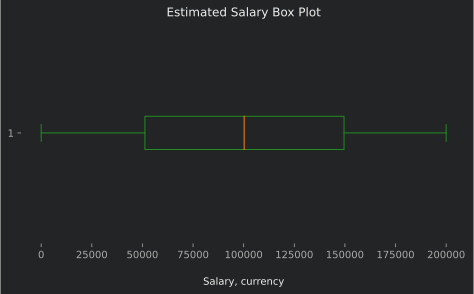

In [23]:
with mpl.rc_context(custom_params):
    plt.figure(
            figsize=(8, 4),
    )
    plt.boxplot(
        customers_data['estimated_salary'],
        vert=False,
        showfliers=True,
        boxprops={'color': 'forestgreen',},
        whiskerprops={'color': 'forestgreen',},
        capprops={'color': 'forestgreen',},
    )
    plt.title('Estimated Salary Box Plot')
    plt.xlabel('Salary, currency')
    plt.show()

Разделим набор данных на признаки `features` и целевой признак `target`.

In [24]:
target = customers_data['exited']
features = customers_data.drop('exited', axis=1)

In [25]:
cat_col = list(set(features.columns) - set(num_col))

### Ordinal Encoding

Пройдемся `Порядковым Кодированием` по категориальным признакам.

In [26]:
encoder = OrdinalEncoder()

In [27]:
features_ordinal = pd.DataFrame(
    encoder.fit_transform(features), 
    columns=features.columns
)

### Standard Scaler

Стандартизируем числовые признаки.  
Теперь все признаки числовые)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Scaler можно применять только после разбиения выборки на части. При этом он должен быть обучен только на тренировочной части данных, а применен ко всем выборкам.
</div>

<div class="alert alert-block alert-warning">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p>
        <b>Изменения:</b>
        <span style="color:#494949">Перенёс <code>Standard Scaler</code> обучил на тренировочном наборе, применил ко всем наборам <code>features</code>.</span>
    </p>
    <a href="#standard_scaler">Standard Scaler теперь после деления на выборки ></a>
</div>

In [28]:
display(
features_ordinal.info()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   float64
 1   geography         9091 non-null   float64
 2   gender            9091 non-null   float64
 3   age               9091 non-null   float64
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   float64
 7   has_cr_card       9091 non-null   float64
 8   is_active_member  9091 non-null   float64
 9   estimated_salary  9091 non-null   float64
dtypes: float64(10)
memory usage: 710.4 KB


None

In [29]:
display(
features_ordinal.describe()
)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
count,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000,9091.000000
mean,257.798812,0.746783,0.547135,20.948411,4.997690,1854.942691,0.530195,0.704983,0.515565,4544.122979
std,96.236567,0.826879,0.497801,10.551945,2.894723,1933.810284,0.581003,0.456076,0.499785,2624.303175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,0.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2271.500000
50%,259.000000,0.000000,1.000000,19.000000,5.000000,1263.000000,0.000000,1.000000,1.000000,4544.000000
75%,324.000000,1.000000,1.000000,26.000000,7.000000,3534.500000,1.000000,1.000000,1.000000,6816.500000
max,457.000000,2.000000,1.000000,69.000000,10.000000,5806.000000,3.000000,1.000000,1.000000,9089.000000


## Исследуйте баланс классов, обучите модель без учёта дисбаланса.

### Баланс Вильфредо Парето

In [30]:
display(
    target.describe()
)

count     9091
unique       2
top          0
freq      7237
Name: exited, dtype: int64

In [31]:
part_of_zeros = target.describe()['freq'] / len(target.index)
part_of_ones = 1 - part_of_zeros

print(
    'Процент ушедших клиентов в наброе данных: {:.2%}'.format(
        part_of_ones
    ),
    'Процент оставшихся клиентов в наброе данных: {:.2%}'.format(
        part_of_zeros
    ),
    sep='\n'
)

Процент ушедших клиентов в наброе данных: 20.39%
Процент оставшихся клиентов в наброе данных: 79.61%


### Обучим случайный лес RandomForestClassifier

Разделим на `train`, `valid` и `test` выборки 60% 20% 20% соответственно.

In [32]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ordinal,
    target,
    test_size=0.2,
    random_state=random_seed,
)

features_train, features_test, target_train, target_test = train_test_split(
    features_train,
    target_train,
    test_size=0.25,
    random_state=random_seed,
)

<a id="standard_scaler"></a>
### Standard Scaler

In [33]:
pd.options.mode.chained_assignment = None

In [34]:
scaler = StandardScaler()
scaler.fit(features_train[num_col])
features_train[num_col] = scaler.transform(features_train[num_col])
features_valid[num_col] = scaler.transform(features_valid[num_col])
features_test[num_col] = scaler.transform(features_test[num_col])

Без стратификации по `exited`

In [35]:
print(
    'train amount:\t{:.2%}'.format(len(target_train) / len(target)),
    'valid amount:\t{:.2%}'.format(len(target_valid) / len(target)),
    'test amount:\t{:.2%}'.format(len(target_test) / len(target)),
    '\n',
    'train\'s exited:\t{:.2%}'.format(sum(target_train) / len(target_train)),
    'valid\'s exited:\t{:.2%}'.format(sum(target_valid) / len(target_valid)),
    'test\'s exited:\t{:.2%}'.format(sum(target_test) / len(target_test)),
    sep='\n'
)

train amount:	59.99%
valid amount:	20.01%
test amount:	20.00%


train's exited:	20.41%
valid's exited:	19.63%
test's exited:	21.12%


<div class="alert alert-block alert-success">
<b>Успех:</b> Разбиение было сделано правильно. Радует, что была реализована проверка корректности разбиения!
</div>

In [36]:
param = {
    'max_depth': [6, 9, 12, 15, None], 
    'n_estimators': [70, 100, 150], 
    'max_features': [1, 3, 5, 7],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'bootstrap':[True, False],
    'min_samples_leaf': [1, 2, 3, 4 , 5],
} 

In [37]:
forest_classifier = RandomForestClassifier(
    random_state=random_seed
)

In [38]:
rnd_search = RandomizedSearchCV(
    estimator=forest_classifier,
    param_distributions=param,
    n_iter =10,
    scoring='f1',
    random_state=random_seed,
)
rnd_search.fit(features_train, target_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=108108108),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 9, 12, 15, None],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [70, 100, 150]},
                   random_state=108108108, scoring='f1')

In [39]:
display(
    rnd_search.best_params_,
    rnd_search.best_score_
)

{'n_estimators': 70,
 'min_samples_leaf': 3,
 'max_features': 7,
 'max_depth': 12,
 'criterion': 'entropy',
 'bootstrap': False}

0.565777368529503

In [40]:
model = RandomForestClassifier(
    random_state=random_seed,
    # class_weight='balanced',
    **rnd_search.best_params_
)

model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

In [41]:
print('f1: {: .4f}'.format(
        f1_score(target_valid, predicted_valid)
    )
 )

f1:  0.5686


In [42]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one = probabilities_valid[:, 1]
fpr, tpr, _ = roc_curve(target_valid, probabilities_one)

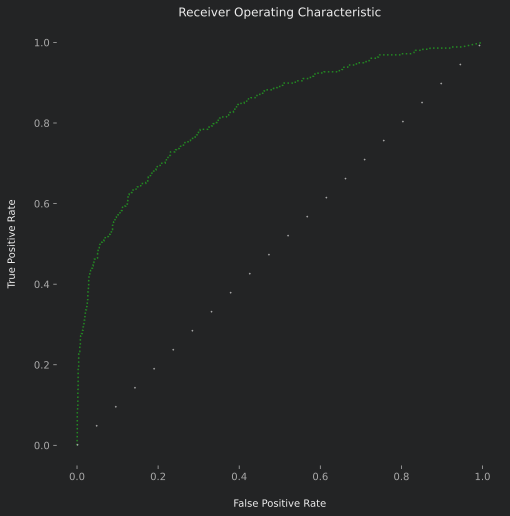

In [43]:
plot_acu_roc(
    fpr,
    tpr,
    'Receiver Operating Characteristic',
)

In [44]:
f1_max, threshold_nice = threshold_finder(probabilities_valid)

In [45]:
print('threshold ={: .3f}\tf1:{: .5f}'.format(
        threshold_nice,
        f1_max
    )
)

threshold = 0.320	f1: 0.57929


In [46]:
probabilities_test = model.predict_proba(features_test)
probab_one_threshold  = (probabilities_test[:, 1] > threshold_nice).astype('int')
fpr_test, tpr_test, thresholds_test = roc_curve(target_test, probab_one_threshold)

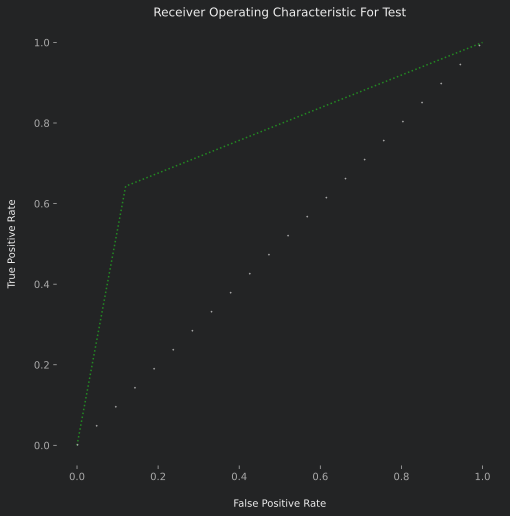

In [47]:
plot_acu_roc(
    fpr_test,
    tpr_test,
    'Receiver Operating Characteristic For Test',
)

In [48]:
predicted_test = model.predict(features_test)

In [49]:
print('f1: {: .4f} \t threshold ={: .4f}'.format(
        f1_score(target_test, probab_one_threshold),
        threshold_nice
    )
 )

f1:  0.6152 	 threshold = 0.3200


In [50]:
print('f1: {: .4f} \t threshold = 0.5'.format(
        f1_score(target_test, predicted_test)
    )
 )

f1:  0.5759 	 threshold = 0.5


### Кратко выводы.

- Случайная `class_weight=None` выборка дала разброс целевого класса около 1~2% между train, valid и test
- Подбор поргога (threshold) повысил показатель f1-score
- f1-score всё ещё далёк от еденицы 🎚️
- В данных дисбаланс **Ⓒ Captain Obvious**

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подбора параметров использовался метод основанный на кросс-валидации с подходящей метрикой!
</div>

## Улучшите качество модели, учитывая дисбаланс классов.

Добавим стратификацию по `exited`, чтобы выборки содержали категории целевого параметра в равных пропорциях.

In [51]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ordinal,
    target,
    test_size=0.2,
    random_state=random_seed,
    stratify=target
)

features_train, features_test, target_train, target_test = train_test_split(
    features_train,
    target_train,
    test_size=0.25,
    random_state=random_seed,
    stratify=target_train
)

<a id="standard_scaler"></a>
### Standard Scaler

In [52]:
pd.options.mode.chained_assignment = None

In [53]:
scaler = StandardScaler()
scaler.fit(features_train[num_col])
features_train[num_col] = scaler.transform(features_train[num_col])
features_valid[num_col] = scaler.transform(features_valid[num_col])
features_test[num_col] = scaler.transform(features_test[num_col])

Со стратификацией по `exited`

In [54]:
print(
    'train amount:\t{:.2%}'.format(len(target_train) / len(target)),
    'valid amount:\t{:.2%}'.format(len(target_valid) / len(target)),
    'test amount:\t{:.2%}'.format(len(target_test) / len(target)),
    '\n',
    'train\'s exited:\t{:.2%}'.format(sum(target_train) / len(target_train)),
    'valid\'s exited:\t{:.2%}'.format(sum(target_valid) / len(target_valid)),
    'test\'s exited:\t{:.2%}'.format(sum(target_test) / len(target_test)),
    sep='\n'
)

train amount:	59.99%
valid amount:	20.01%
test amount:	20.00%


train's exited:	20.39%
valid's exited:	20.40%
test's exited:	20.41%


<hr/>

### Обучите разные модели и найдите лучшую.

#### RandomForestClassifier

In [55]:
rnd_search = RandomizedSearchCV(
    estimator=forest_classifier,
    param_distributions=param,
    n_iter =10,
    scoring='f1',
    random_state=random_seed,
)
rnd_search.fit(features_train, target_train)

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=108108108),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 9, 12, 15, None],
                                        'max_features': [1, 3, 5, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [70, 100, 150]},
                   random_state=108108108, scoring='f1')

In [56]:
print(
    rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(rnd_search.best_score_)
)

{'n_estimators': 150, 'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 15, 'criterion': 'log_loss', 'bootstrap': True} 
f1 = 0.5630


Добавим `class_weight='balanced'` и обучим `RandomForestClassifier`  
> The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [57]:
rnd_forest_model = RandomForestClassifier(
    random_state=random_seed,
    class_weight='balanced',
    **rnd_search.best_params_
)

rnd_forest_model.fit(features_train, target_train)
predicted_valid = rnd_forest_model.predict(features_valid)

In [58]:
print('f1: {: .4f}'.format(
        f1_score(target_valid, predicted_valid)
    )
 )

f1:  0.5770


In [59]:
probabilities_valid = rnd_forest_model.predict_proba(features_valid)

In [60]:
f1_max, threshold_nice = threshold_finder(probabilities_valid)

In [61]:
print('threshold ={: .3f}\tf1:{: .5f}'.format(
        threshold_nice,
        f1_max
    )
)

threshold = 0.355	f1: 0.63170


<a id="top_model"></a>
#### Тестирование лучшей модели RandomForestClassifier

<a id='play_with_test'></a>
##### Проведём проверку здесь вместо [крайнего раздела](#the_end)

Объеденим `train` и `valid` данные, чтобы получше обучить модель.

In [62]:
features_plus_train = pd.concat(
    [features_train, features_valid],
    ignore_index=True
)

target_plus_train = pd.concat(
    [target_train, target_valid],
    ignore_index=True
)

In [63]:
rnd_forest_model.fit(features_plus_train, target_plus_train)

probabilities_test = rnd_forest_model.predict_proba(features_test)
predicted_test_treshhold = (probabilities_test[:, 1] >= threshold_nice).astype('int')

In [64]:
print('f1: {: .4f}'.format(
        f1_score(target_test, predicted_test_treshhold)
    )
 )

f1:  0.5980


<div class="alert alert-block alert-info">
<b>Совет: </b> Тестирование лучше выносить в отдельный пункт.
</div>

<div class="alert alert-block alert-warning">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p>
        <b>Изменения:</b>
        <span style="color:#494949">Создал раздел, чтобы не менять название переменных. Потомучто переиспользую названия.</span>
        <br/>
        <a href="#top_model" style="font-weight: 700;">Тестирование лучшей модели RandomForestClassifier ></a>
    </p>
    <p>
        <b>Коментарий:</b>
        <span style="color:#494949">В следующий раз сделаю в окончании проекта)</span><br/>
        <span style="color:#494949">Спасибо за совет.</span>
    </p>
</div>

<hr/>

#### DecisionTreeClassifier

In [65]:
tree_classifier = DecisionTreeClassifier(
    random_state=random_seed,
    class_weight='balanced'
)

In [66]:
tree_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [6, 9, 12, 15, 17],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4 , 5],
    'max_features': [1, 3, 5, 7, 9, None],
} 

In [67]:
tree_rnd_search = RandomizedSearchCV(
    estimator=tree_classifier,
    param_distributions=tree_param,
    n_iter =10,
    cv=9,
    scoring='f1',
    random_state=random_seed,
)
tree_rnd_search.fit(features_train, target_train)

RandomizedSearchCV(cv=9,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=108108108),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [6, 9, 12, 15, 17],
                                        'max_features': [1, 3, 5, 7, 9, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5]},
                   random_state=108108108, scoring='f1')

In [68]:
print(
    tree_rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(tree_rnd_search.best_score_)
)

{'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 9, 'max_depth': 6, 'criterion': 'log_loss'} 
f1 = 0.5523


In [69]:
dcsn_tree_model = DecisionTreeClassifier(
    random_state=random_seed,
    class_weight='balanced',
    **tree_rnd_search.best_params_
)

dcsn_tree_model.fit(features_train, target_train)
predicted_valid = dcsn_tree_model.predict(features_valid)

In [70]:
print('f1: {: .4f}'.format(
        f1_score(target_valid, predicted_valid)
    )
 )

f1:  0.5594


In [71]:
predicted_valid = dcsn_tree_model.predict(features_valid)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(target_valid, predicted_valid)

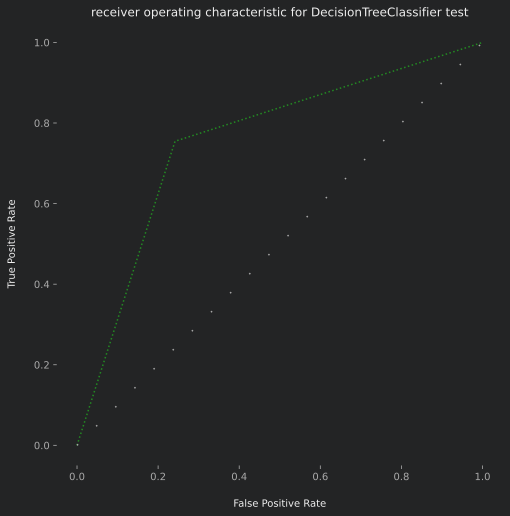

In [72]:
plot_acu_roc(
    fpr_valid,
    tpr_valid,
    'receiver operating characteristic for DecisionTreeClassifier test',
)

In [73]:
probabilities_valid = dcsn_tree_model.predict_proba(features_valid)

In [74]:
f1_max, threshold_nice = threshold_finder(probabilities_valid)

In [75]:
print('threshold ={: .3f}\tf1:{: .5f}'.format(
        threshold_nice,
        f1_max
    )
)

threshold = 0.585	f1: 0.59126


In [76]:
dcsn_tree_model.fit(features_plus_train, target_plus_train)

probabilities_test = dcsn_tree_model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
predicted_test_treshhold = (probabilities_test[:, 1] >= threshold_nice).astype('int')

In [80]:
print('f1:\t\t\t{: .4f}'.format(
        f1_score(target_test, predicted_test_treshhold)
    )
 )
print('площадь под кривой ROC: {: .4f}'.format(
        roc_auc_score(target_test, probabilities_one_test)
    )
)

f1:			 0.5906
площадь под кривой ROC:  0.8131


<hr/>

#### LogisticRegression

One-Hot Encoding

In [81]:
features_ohe = pd.get_dummies(
    data=features,
    drop_first=True,
)

In [82]:
display(
    list(features_ohe.columns)
)

['credit_score',
 'age',
 'tenure',
 'balance',
 'num_of_products',
 'estimated_salary',
 'geography_Germany',
 'geography_Spain',
 'gender_Male',
 'has_cr_card_1',
 'is_active_member_1']

In [83]:
display(
    features_ohe.info()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 15634602 to 15682355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_score        9091 non-null   uint16 
 1   age                 9091 non-null   uint8  
 2   tenure              9091 non-null   uint8  
 3   balance             9091 non-null   float64
 4   num_of_products     9091 non-null   uint8  
 5   estimated_salary    9091 non-null   float64
 6   geography_Germany   9091 non-null   uint8  
 7   geography_Spain     9091 non-null   uint8  
 8   gender_Male         9091 non-null   uint8  
 9   has_cr_card_1       9091 non-null   uint8  
 10  is_active_member_1  9091 non-null   uint8  
dtypes: float64(2), uint16(1), uint8(8)
memory usage: 301.8 KB


None

In [84]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_ohe,
    target,
    test_size=0.2,
    random_state=random_seed,
)

features_train, features_test, target_train, target_test = train_test_split(
    features_train,
    target_train,
    test_size=0.25,
    random_state=random_seed,
)

In [85]:
log_reg_classifier = LogisticRegression(
    random_state=random_seed,
    class_weight='balanced',
    n_jobs= -1,
)

> The choice of the algorithm depends on the penalty chosen: Supported penalties by solver:  
    ‘newton-cg’ - [‘l2’, ‘none’]  
    ‘lbfgs’ - [‘l2’, ‘none’]  
    ‘liblinear’ - [‘l1’, ‘l2’]  
    ‘sag’ - [‘l2’, ‘none’]  
    ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]  

In [86]:
log_reg_param = {
    'penalty': ['l2', 'none'],
    'tol': [0.0001, ],
    'C': np.arange(0.1, 1.1, 0.15),
    'fit_intercept': [True, ],
    'solver': ['newton-cg', 'lbfgs', 'sag',  'saga'],
    'max_iter': range(50, 500, 50),
    'warm_start': [False, True],
}
    # Useful only when the solver ‘liblinear’ is used
    # 'intercept_scaling': [1, ],
        
    # Only used if penalty='elasticnet'
    # 'l1_ratio': [None, ],


In [87]:
rnd_search = RandomizedSearchCV(
    estimator=log_reg_classifier,
    param_distributions=log_reg_param,
    n_iter =10,
    scoring='f1',
    random_state=random_seed,
)

rnd_search.fit(features_train, target_train)

/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=108108108),
                   param_distributions={'C': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                                        'fit_intercept': [True],
                                        'max_iter': range(50, 500, 50),
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga'],
                                        'tol': [0.0001],
                                        'warm_start': [False, True]},
                   random_state=108108108, scoring='f1')

In [88]:
print(
    rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(rnd_search.best_score_)
)

{'warm_start': False, 'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'C': 0.25} 
f1 = 0.4918


In [89]:
log_reg_param = {
    'penalty': ['l1',],
    'tol': [0.0001, ],
    'C': np.arange(0.1, 1.1, 0.15),
    'fit_intercept': [True, ],
    'solver': ['liblinear',  'saga'],
    'max_iter': range(50, 500, 50),
    'warm_start': [False, True],
}
    # Useful only when the solver ‘liblinear’ is used
    # 'intercept_scaling': [1, ],
        
    # Only used if penalty='elasticnet'
    # 'l1_ratio': [None, ],


In [90]:
rnd_search = RandomizedSearchCV(
    estimator=log_reg_classifier,
    param_distributions=log_reg_param,
    n_iter =10,
    # cv=9,
    scoring='f1',
    random_state=random_seed,
)

rnd_search.fit(features_train, target_train)

/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=108108108),
                   param_distributions={'C': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                                        'fit_intercept': [True],
                                        'max_iter': range(50, 500, 50),
                                        'penalty': ['l1'],
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001],
                                        'warm_start': [False, True]},
                   random_state=108108108, scoring='f1')

In [91]:
print(
    rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(rnd_search.best_score_)
)

{'warm_start': True, 'tol': 0.0001, 'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 50, 'fit_intercept': True, 'C': 0.9999999999999999} 
f1 = 0.4904


In [92]:
log_reg_classifier = LogisticRegression(
    random_state=random_seed,
    class_weight='balanced',
    **rnd_search.best_params_,
)

In [93]:
log_reg_classifier.fit(features_train, target_train)

LogisticRegression(C=0.9999999999999999, class_weight='balanced', max_iter=50,
                   penalty='l1', random_state=108108108, solver='liblinear',
                   warm_start=True)

In [94]:
predicted_valid = log_reg_classifier.predict(features_valid)

In [95]:
print('f1: {: .4f}'.format(
        f1_score(target_valid, predicted_valid)
    )
 )

f1:  0.4675


<a id="upsampling"></a>
#### LogisticRegression С Применением Upsampling

In [117]:
count_customers = customers_data.loc[customers_data['exited'] != 1, 'exited'].count()

customers_data_up = resample(
    customers_data.loc[customers_data['exited'] == 1],
    random_state=random_seed,
    replace=True,
    n_samples=count_customers
)

In [118]:
customers_data_up = pd.concat(
    [customers_data_up, customers_data.loc[customers_data['exited'] != 1]],
    axis=0,
    ignore_index=True, 
)

In [122]:
display(
    customers_data_up.info(),
    len(customers_data_up.loc[customers_data_up['exited']  != 1, 'exited']),
    len(customers_data_up.loc[customers_data_up['exited'] == 1, 'exited']),
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14474 entries, 0 to 14473
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   credit_score      14474 non-null  uint16  
 1   geography         14474 non-null  category
 2   gender            14474 non-null  category
 3   age               14474 non-null  uint8   
 4   tenure            14474 non-null  uint8   
 5   balance           14474 non-null  float64 
 6   num_of_products   14474 non-null  uint8   
 7   has_cr_card       14474 non-null  category
 8   is_active_member  14474 non-null  category
 9   estimated_salary  14474 non-null  float64 
 10  exited            14474 non-null  category
dtypes: category(5), float64(2), uint16(1), uint8(3)
memory usage: 368.2 KB


None

7237

7237

In [124]:
target_up = customers_data_up['exited']
features_up = customers_data_up.drop('exited', axis=1)

In [125]:
target_up_ohe = pd.get_dummies(
    data=features_up,
    drop_first=True,
)

In [126]:
features_train, features_valid, target_train, target_valid = train_test_split(
    target_up_ohe,
    target_up,
    test_size=0.2,
    random_state=random_seed,
)

features_train, features_test, target_train, target_test = train_test_split(
    features_train,
    target_train,
    test_size=0.25,
    random_state=random_seed,
)

In [127]:
log_reg_classifier = LogisticRegression(
    random_state=random_seed,
    class_weight='balanced',
    n_jobs= -1,
)

In [128]:
log_reg_param = {
    'penalty': ['l2', 'none'],
    'tol': [0.0001, ],
    'C': np.arange(0.1, 1.1, 0.15),
    'fit_intercept': [True, ],
    'solver': ['newton-cg', 'lbfgs', 'sag',  'saga'],
    'max_iter': range(50, 500, 50),
    'warm_start': [False, True],
}
    # Useful only when the solver ‘liblinear’ is used
    # 'intercept_scaling': [1, ],
        
    # Only used if penalty='elasticnet'
    # 'l1_ratio': [None, ],


In [129]:
rnd_search = RandomizedSearchCV(
    estimator=log_reg_classifier,
    param_distributions=log_reg_param,
    n_iter =10,
    scoring='f1',
    random_state=random_seed,
)

rnd_search.fit(features_train, target_train)

/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=108108108),
                   param_distributions={'C': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                                        'fit_intercept': [True],
                                        'max_iter': range(50, 500, 50),
                                        'penalty': ['l2', 'none'],
                                        'solver': ['newton-cg', 'lbfgs', 'sag',
                                                   'saga'],
                                        'tol': [0.0001],
                                        'warm_start': [False, True]},
                   random_state=108108108, scoring='f1')

In [88]:
print(
    rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(rnd_search.best_score_)
)

{'warm_start': False, 'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'C': 0.25} 
f1 = 0.4918


In [89]:
log_reg_param = {
    'penalty': ['l1',],
    'tol': [0.0001, ],
    'C': np.arange(0.1, 1.1, 0.15),
    'fit_intercept': [True, ],
    'solver': ['liblinear',  'saga'],
    'max_iter': range(50, 500, 50),
    'warm_start': [False, True],
}
    # Useful only when the solver ‘liblinear’ is used
    # 'intercept_scaling': [1, ],
        
    # Only used if penalty='elasticnet'
    # 'l1_ratio': [None, ],


In [90]:
rnd_search = RandomizedSearchCV(
    estimator=log_reg_classifier,
    param_distributions=log_reg_param,
    n_iter =10,
    # cv=9,
    scoring='f1',
    random_state=random_seed,
)

rnd_search.fit(features_train, target_train)

/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bionic/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:35

RandomizedSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=108108108),
                   param_distributions={'C': array([0.1 , 0.25, 0.4 , 0.55, 0.7 , 0.85, 1.  ]),
                                        'fit_intercept': [True],
                                        'max_iter': range(50, 500, 50),
                                        'penalty': ['l1'],
                                        'solver': ['liblinear', 'saga'],
                                        'tol': [0.0001],
                                        'warm_start': [False, True]},
                   random_state=108108108, scoring='f1')

In [88]:
print(
    rnd_search.best_params_,
    '\nf1 = {:.4f}'.format(rnd_search.best_score_)
)

{'warm_start': False, 'tol': 0.0001, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 300, 'fit_intercept': True, 'C': 0.25} 
f1 = 0.4918


### Кратко выводы

- Лучший f1-score = 0.6317 на валидационной выборке показал `RandomForestClassifier`
- На тестовой же выборке f1-score уменьшился до 0.598
- Подбор гиперпараметров для `LogisticRegression` очень ветьеват, возможно, поэтому f1-score = 0.4735
- Вот не очень верится в upsampling и downsampling, но на LogisticRegression улучшился f1-score на пару сотых)

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Нужно попробовать еще, хотя бы один, метод для борьбы с дисбалансом классов.
</div>

<div class="alert alert-block alert-warning">
    <span style="font-size:0.7rem">Student's note 01</span>
    <p>
        <b>Изменения:</b>
        <span style="color:#494949">Сделал upsampling и проверил на LogisticRegression.</span>
        <br/>
        <a href="#upsampling" style="font-weight: 700;">LogisticRegression на данных с upsampling></a>
    </p>
</div>

<hr/>

<a id='the_end'></a>
> ## Проведите финальное тестирование.

Проверку сделал в разделе [RandomForestClassifier](#play_with_test)

<hr/>

Признаки:  
`RowNumber` — индекс строки в данных  
`CustomerId` — уникальный идентификатор клиента  
`Surname` — фамилия  
`CreditScore` — кредитный рейтинг  
`Geography` — страна проживания  
`Gender` — пол  
`Age` — возраст  
`Tenure` — сколько лет человек является клиентом банка  
`Balance` — баланс на счёте  
`NumOfProducts` — количество продуктов банка, используемых клиентом  
`HasCrCard` — наличие кредитной карты  
`IsActiveMember` — активность клиента  
`EstimatedSalary` — предполагаемая зарплата  
`Целевой` признак  
`Exited` — факт ухода клиента  

## Как будут проверять мой проект?


На что обращают внимание ревьюер, проверяя проект:
 - Как вы готовите данные к обучению? Все ли типы признаков обрабатываете?
 - Хорошо ли поясняете этапы предобработки?
 - Как исследуете баланс классов?
 - Изучаете ли модель без учёта дисбаланса классов?
 - Какие выводы об исследовании задачи делаете?
 - Корректно ли разбиваете данные на выборки?
 - Как работаете с несбалансированными классами?
 - Правильно ли проводите обучение, валидацию и финальное тестирование модели?
 - Насколько высокое значение f1-меры получаете?
 - Изучаете ли значения метрики AUC-ROC?
 - Следите за структурой проекта и поддерживаете аккуратность кода?